In [1]:
import ultralytics 
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.10.14 torch-2.4.1 CPU (Apple M3 Max)
Setup complete ✅ (16 CPUs, 48.0 GB RAM, 1047.3/1858.2 GB disk)


In [3]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 49.6MB/s]
Ultralytics 8.3.29 🚀 Python-3.10.14 torch-2.4.1 CPU (Apple M3 Max)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100%|██████████████████████████████████████| 49.2k/49.2k [00:00<00:00, 5.95MB/s]
image 1/1 /Users/pw/Documents/GitHub/for_ROS2_study/공짜술/DeepLearning Tutorials/zidane.jpg: 384x640 2 persons, 1 tie, 28.7ms
Speed: 1.0ms preprocess, 28.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


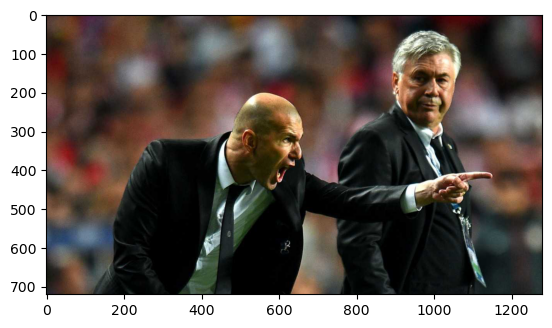

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./zidane.jpg')
plt.imshow(img);

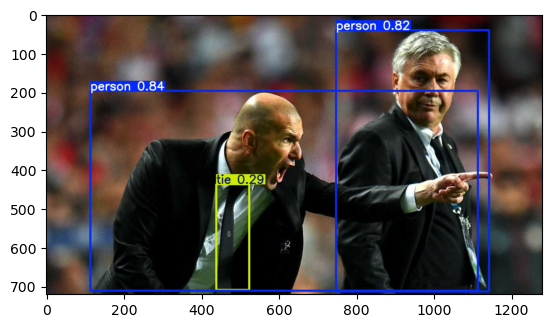

In [ ]:
predicted_img = Image.open('./runs/detect/predict/zidane.jpg')
plt.imshow(predicted_img);

In [36]:
from IPython.display import Image, clear_output, display
import cv2, time

def display_image(frame):
    _, buffer = cv2.imencode('.jpg', frame)
    clear_output(wait=True)
    display(Image(data=buffer, width=500))
    time.sleep(0.03)

In [37]:
def run_camera(duration=5, camera_index=0):
    cap = cv2.VideoCapture(camera_index)

    start = time.time()
    while time.time() - start < duration:
        ret, frame = cap.read()
        display_image(frame)



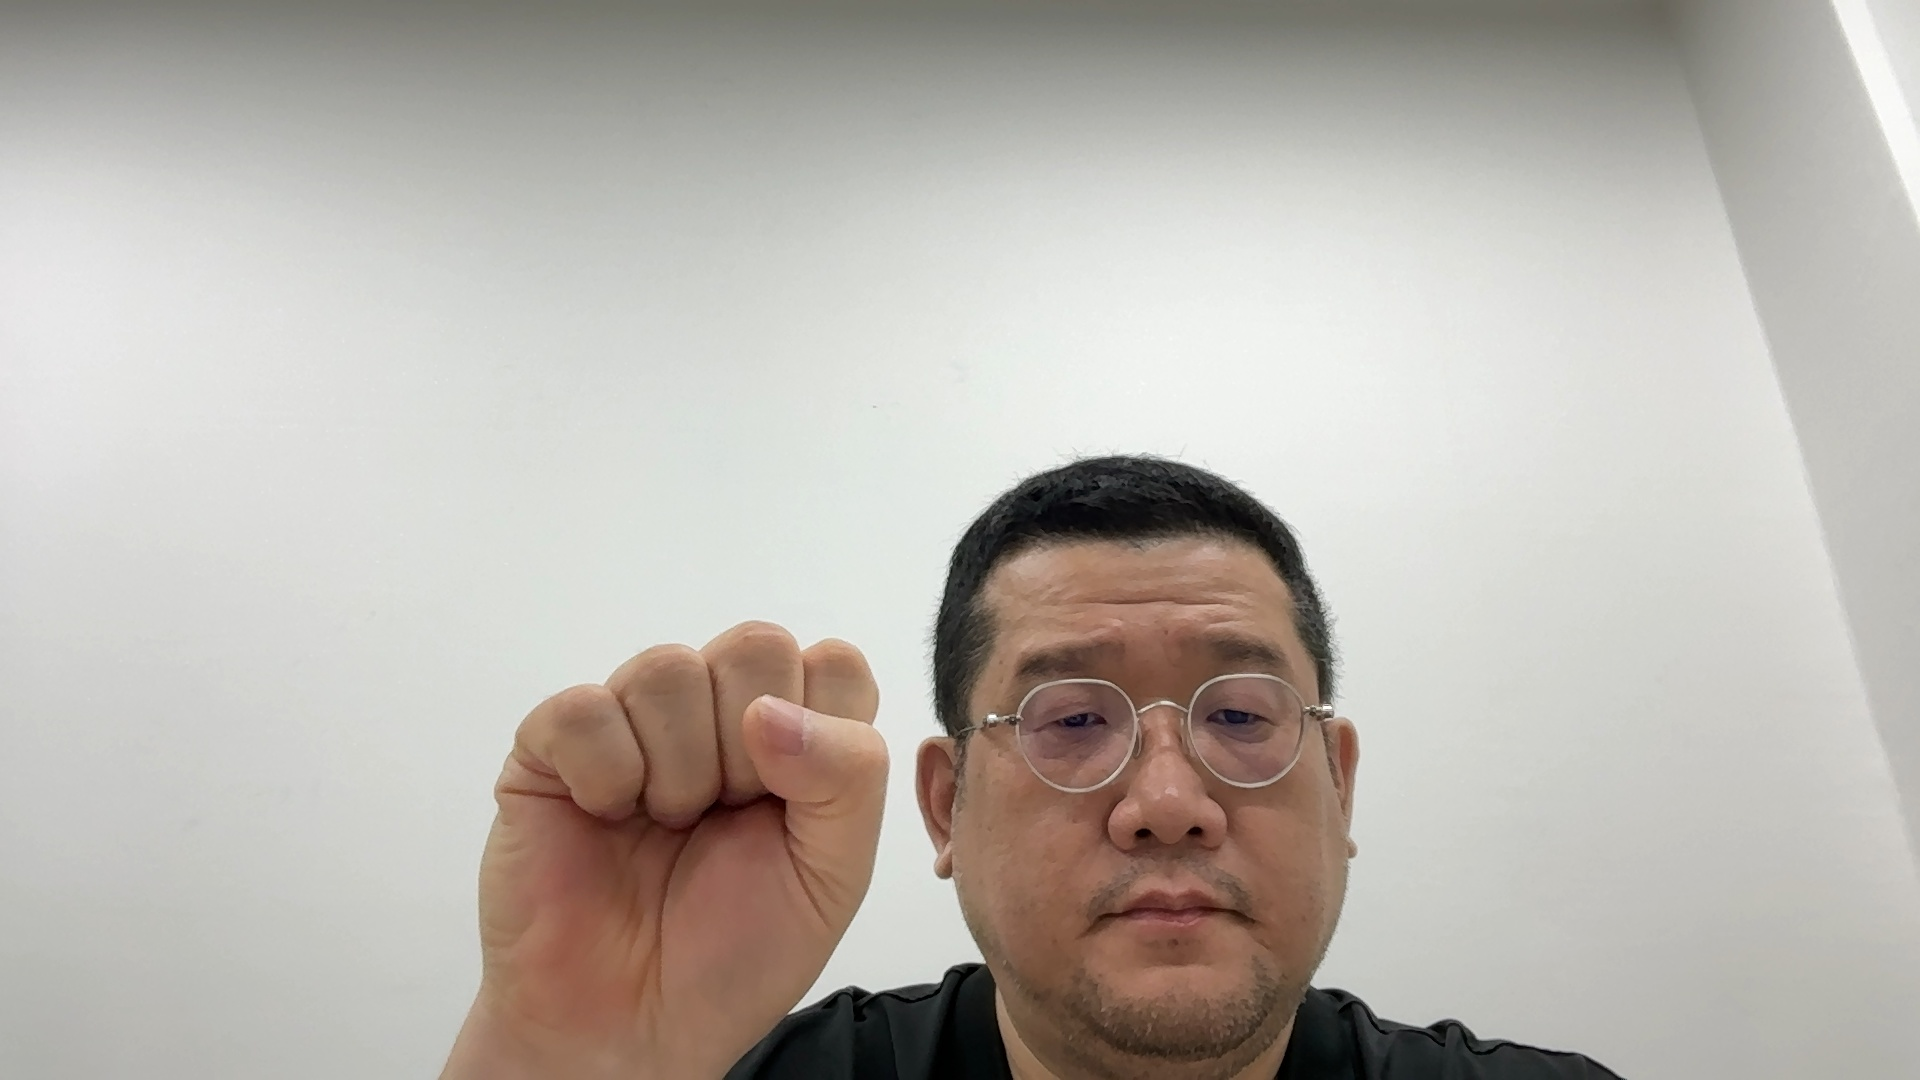

In [38]:
run_camera()

In [39]:
from ultralytics import YOLO

camera_index = 0
cap = cv2.VideoCapture(camera_index)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
cap.set(cv2.CAP_PROP_FPS, 10)

True

In [40]:
def run_yolo_cam(cap=cap, duration=5, model_path='yolov8n.pt'):
    model = YOLO(model_path)
    start = time.time()

    while time.time() - start < duration:
        ret, frame = cap.read()
        results = model(frame)        # results는 리스트, results[0]이 첫 번째 프레임 결과
        annotated = results[0].plot() # plot()이 그려진 이미지를 numpy array로 반환
        display_image(annotated)

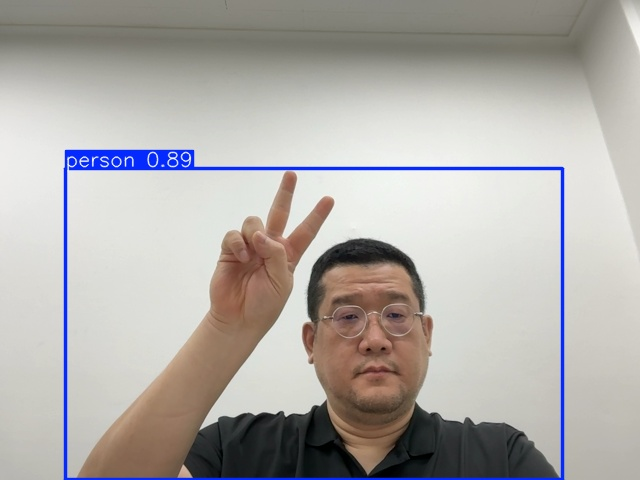

In [41]:
run_yolo_cam()

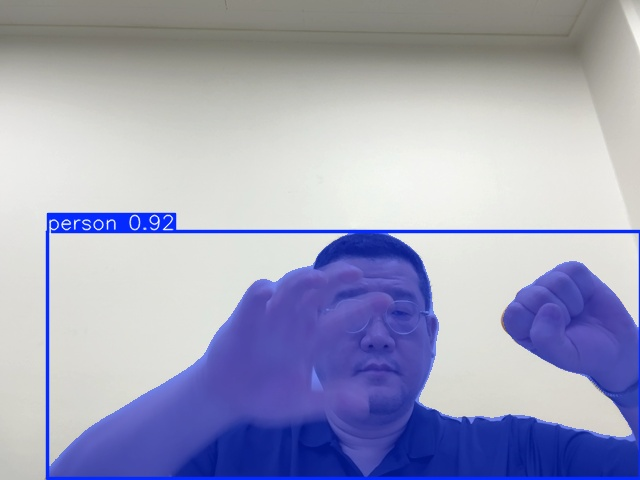

In [42]:
run_yolo_cam(duration=10, model_path='yolov8n-seg.pt')

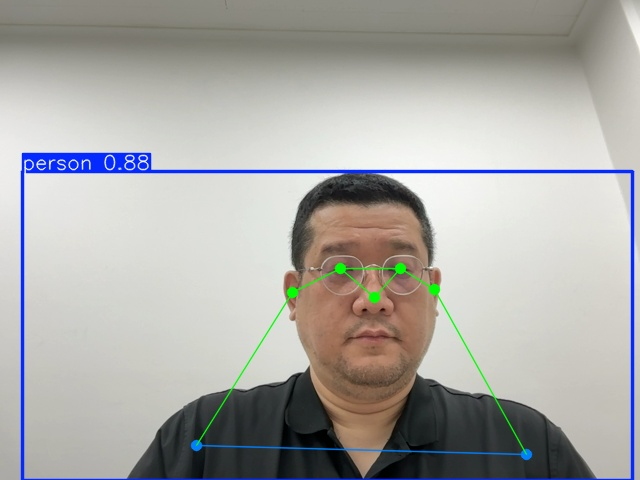

In [43]:
run_yolo_cam(duration=10, model_path='yolov8n-pose.pt')

In [44]:
cap.release()